In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()

In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector
import time
start_time = time.time()

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

model = EcoModel(50, 50, 0.4, 0.07)

for i in range(150):
    model.step()
    
print(time.time()-start_time)

Vegetated: 266
Empty: 400
Degraded: 1844
Vegetated: 256
Empty: 500
Degraded: 1743
Vegetated: 257
Empty: 532
Degraded: 1703
Vegetated: 265
Empty: 537
Degraded: 1699
Vegetated: 264
Empty: 566
Degraded: 1666
Vegetated: 268
Empty: 595
Degraded: 1635
Vegetated: 270
Empty: 596
Degraded: 1634
Vegetated: 270
Empty: 595
Degraded: 1637
Vegetated: 268
Empty: 606
Degraded: 1629
Vegetated: 265
Empty: 610
Degraded: 1624
Vegetated: 266
Empty: 600
Degraded: 1630
Vegetated: 270
Empty: 608
Degraded: 1620
Vegetated: 272
Empty: 586
Degraded: 1635
Vegetated: 279
Empty: 581
Degraded: 1644
Vegetated: 275
Empty: 561
Degraded: 1666
Vegetated: 273
Empty: 557
Degraded: 1664
Vegetated: 279
Empty: 557
Degraded: 1660
Vegetated: 283
Empty: 534
Degraded: 1674
Vegetated: 292
Empty: 554
Degraded: 1676
Vegetated: 270
Empty: 553
Degraded: 1679
Vegetated: 268
Empty: 538
Degraded: 1696
Vegetated: 266
Empty: 542
Degraded: 1686
Vegetated: 272
Empty: 515
Degraded: 1697
Vegetated: 288
Empty: 510
Degraded: 1707
Vegetated: 283
E

In [3]:
stats = model.datacollector.get_model_vars_dataframe()


In [4]:
stats.head(10)

,Degraded,Empty,Vegetated,qplusminus,qplusplus
0,1967,267,266,0.791353,0.110902
1,1844,400,256,0.603516,0.117188
2,1743,500,257,0.468872,0.142023
3,1703,532,265,0.400943,0.186792
4,1699,537,264,0.389205,0.198864
5,1666,566,268,0.354478,0.220149
6,1635,595,270,0.300926,0.248148
7,1634,596,270,0.296296,0.257407
8,1637,595,268,0.289179,0.266791
9,1629,606,265,0.275472,0.273585


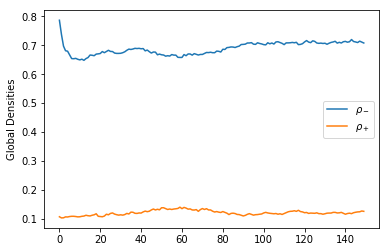

In [5]:
# Figure 3a 
# Plot the global densities at each time step



from matplotlib import pyplot as plt
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.ylabel('Global Densities')
plt.savefig(output_dir+"Global_densities.png", format = 'png' )
plt.show()

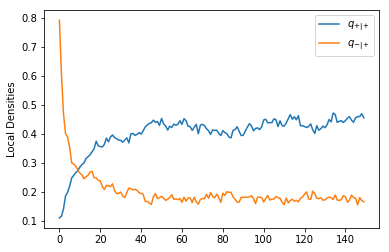

In [6]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites



from matplotlib import pyplot as plt

plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.minusplus, label = r'$q_{-|+}$')
plt.legend()
plt.ylabel('Local Densities')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()



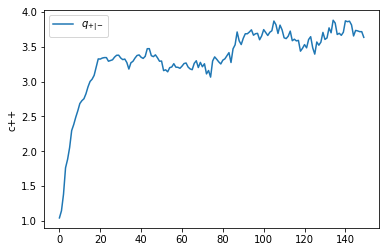

In [7]:
from matplotlib import pyplot as plt
plt.plot(stats.qplusplus/(stats.Vegetated/(total)), label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('c++')
plt.savefig(output_dir + "Clustering_intensity.png", format = 'png' )
plt.show()


In [8]:
# Pair approximation model

def pair_approx_model(r_ev,r_vv,):
    
    ## r_vv : rho_{vegetaged|vegetated}
    ## r_vd : rho_{vegetaged|degraded}
    dr_vv = 2* r_ev* w_ev - 2 * r_vv * w_ve
    dr_vd = r_ed * w_ev + r_ev*w_ed - r_vd*(w_ve + w_de)
    dr_dd = 2* r_ed * w_ed - 2* r_dd*w_de
    dr_v = r_e*w_ev - r_v*w_ve
    dr_d = r_e*w_ed - r_d*w_de
    
    
    return [dr_vv,dr_vd,dr_dd,dr_v,dr_d]

In [9]:
def pair_approx_model(r_init,t, delta, c , r, d, f, m, b,z):
    
    ## r_pp: rho_{vegetaged|vegetated}
    ## r_pm : rho_{vegetaged|degraded}
    ## r_pp, r_pm, r_mm, r_00
    r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00 = r_init
    
      
    dr_pm = d*(r_p - r_pm - r_pp ) + ( r_m - r_mm - r_pm) * ( delta * r_p + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m) ) *  (b-c*r_p) \
            - r_pm*(r + f/z + (z-1)/z*f*(r_pm/r_m) + m)
    
    dr_pp = 2*(r_p - r_pm - r_pp ) * (delta * r_p +  (1-delta)/z + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m)) *  (b-c*r_p) - 2*r_pp * m 
            
    dr_mm = 2*d*(r_m - r_mm - r_pm ) - 2*r_mm*(r + (z-1)/z*f*r_pm/r_m )
    
    dr_p = (delta * r_p + (1-delta)*(r_p + r_pm - r_pp)/( 1- r_p - r_m )) * (b - c*r_p)*\
            (1 - r_p - r_m) - m*r_p
        
    dr_m = d*(1-r_p - r_m) - (r + f * r_pm / r_m) * r_m
    
#     CONSERVATION ecuations

    dr_0 =  - dr_p - dr_m
    dr_p0 = dr_p - dr_pp - dr_pm
    dr_m0 = dr_m - dr_mm - dr_pm
    dr_00 = dr_0 - dr_p0 - dr_m0

    
    return [dr_p, dr_0 ,dr_m, dr_pp, dr_pm, dr_p0, dr_mm, dr_m0, dr_00] 

    
  
#r_pp = r_p - ( r_p0 + r_pm )

#r_00 = r_0 - (r_0p + r_0m)
#r_00 = r_0 - (r_p0 + r_0m)
 
#r_mm = r_m - (r_m0 + r_mp)
#r_mm = r_m - (r_0m + r_pm)



In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

delta = 0
c = 0.3
r = 0
d = 0.2
f = 0.8
m = 0.1
b = 0.4
r_0 = 1/3

r_m = 1/3
r_p = 1/3

r_0 = 0.1

r_m = 0.1
r_p = 0.8
z = 4

r_pp = r_p*r_p
r_pm = r_p*r_m
r_p0 = r_p*r_0
r_mm = r_m*r_m
r_m0 = r_m*r_0
r_00 = r_0*r_0
    
r_init = [r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00]

t = np.linspace(0, 100, 101)


y = odeint(pair_approx_model, r_init, t ,args = (delta, c , r, d, f, m, b,z))


[ 0.1         0.16175557  0.19525149  0.214923    0.22684927  0.23412553
  0.23853466  0.24116773  0.24270796  0.24358477  0.24406635  0.24431812
  0.24444042  0.24449276  0.24450953  0.24450992  0.24450411  0.24449711
  0.24449112  0.24448681  0.24448418  0.2444829   0.2444826   0.24448293
  0.24448361  0.24448445  0.24448532  0.24448613  0.24448684  0.24448743
  0.24448791  0.24448828  0.24448857  0.24448878  0.24448894  0.24448905
  0.24448912  0.24448917  0.2444892   0.24448922  0.24448923  0.24448924
  0.24448924  0.24448924  0.24448924  0.24448924  0.24448924  0.24448924
  0.24448924  0.24448924  0.24448924  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0

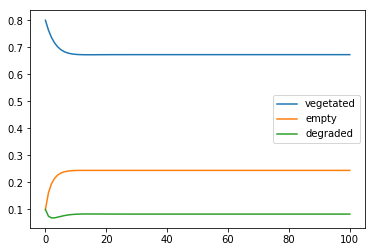

In [11]:
print(y.T[1])
plt.plot(y.T[0], label = "vegetated" )
plt.plot(y.T[1], label = "empty")
plt.plot(y.T[2], label = "degraded")
plt.legend()

plt.show()

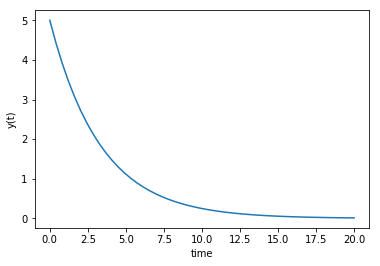

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt



# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()